Сценарий предобработки:
1. загрузка датасета
2. выявить размерность 
    - (сколько строк и колонок)
    - выявить названия колонок
    - типы данных
    - кол-во уник значений в каждой колонке
    - уникальные значения в целевой колонке
3. деление на целевую и факторные переменные
4. изучение состава факторных признаков
    - выявление числовых признаков (x.describe)
    - выявление категориальных признаков
    - перевод категориальных признаков в числовые (get_dummies/labelencoder)
5. обработка выбросов 
    - выявить выбросы(гистограмма/ящик с усами)
    Что можно делать с ними?(sem_11)
        - Выкинуть эти данные
        - Заменять выбросы разными методами (медианы, средние значения и т.д.) 
        - Делать/не делать дополнительный признак
        - Ничего не делать
6. заполнение пропусков 
    - сумма пропусков
    - замена пропусков в категориальных признаках с помощью моды, для чисел возьмем медианное
7. выбор существенных признаков на основе матрицы корреляции (удаление избыточных или несущественных признаков)
8. сохранение результата в файл

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. загрузка датасета

In [ ]:
data = pd.read_csv('beatsdataset.csv', index_col='Unnamed: 0')#потом заменить на свой датасет
data

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,1.594074,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom
1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,1.261364,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom
2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,1.425185,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom
3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,1.463686,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom
4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,1.187854,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.123267,0.057100,3.208952,0.256296,0.251077,1.154926,0.005292,0.224646,-22.367698,1.332630,...,0.003534,0.004703,0.010987,0.032269,0.001926,0.016028,133.333333,0.210512,138.0,Trance
2296,0.142276,0.092951,3.115607,0.264407,0.255826,1.210942,0.010418,0.265019,-22.393598,1.576087,...,0.002769,0.005422,0.008997,0.027547,0.003881,0.016097,133.333333,0.186191,141.0,Trance
2297,0.125569,0.030196,3.192922,0.224583,0.216269,1.031649,0.004061,0.258191,-23.505045,1.646389,...,0.003643,0.005395,0.005646,0.014202,0.004689,0.009465,600.000000,0.142741,92.0,Trance
2298,0.118206,0.108737,3.149557,0.253396,0.246574,1.066546,0.008032,0.200640,-22.203477,1.200322,...,0.001375,0.003538,0.006213,0.035527,0.001729,0.020659,133.333333,0.232040,133.0,Trance


### 2. Описать набор данных и решаемую задачу

Описание датасета
- beatsdataset.csv(Electronic Music Features Dataset) - датасет, состоящий из набора характеристик ста песен по 23 жанрам, эти 100 песен входили в топ-100 по своим жанрам по состоянию на ноябрь 2016 года. Необходим для создания моделей МО по предсказыванию жанра(из раздела Электронная музыка) песни.
- Состоит из 71 признака, которые являются звуковыми характеристиками случайного 2х-минутного участка той или иной песни(звук. файла), выявленными при помощи библиотеки pyAudioAnalysis.
- целевая переменная - class/класс(жанр песни)

Набор данных
- признаки(71шт): 
       '1-ZCRm', '2-Energym', '3-EnergyEntropym', '4-SpectralCentroidm',
       '5-SpectralSpreadm', '6-SpectralEntropym', '7-SpectralFluxm',
       '8-SpectralRolloffm', '9-MFCCs1m', '10-MFCCs2m', '11-MFCCs3m',
       '12-MFCCs4m', '13-MFCCs5m', '14-MFCCs6m', '15-MFCCs7m', '16-MFCCs8m',
       '17-MFCCs9m', '18-MFCCs10m', '19-MFCCs11m', '20-MFCCs12m',
       '21-MFCCs13m', '22-ChromaVector1m', '23-ChromaVector2m',
       '24-ChromaVector3m', '25-ChromaVector4m', '26-ChromaVector5m',
       '27-ChromaVector6m', '28-ChromaVector7m', '29-ChromaVector8m',
       '30-ChromaVector9m', '31-ChromaVector10m', '32-ChromaVector11m',
       '33-ChromaVector12m', '34-ChromaDeviationm', '35-ZCRstd',
       '36-Energystd', '37-EnergyEntropystd', '38-SpectralCentroidstd',
       '39-SpectralSpreadstd', '40-SpectralEntropystd', '41-SpectralFluxstd',
       '42-SpectralRolloffstd', '43-MFCCs1std', '44-MFCCs2std', '45-MFCCs3std',
       '46-MFCCs4std', '47-MFCCs5std', '48-MFCCs6std', '49-MFCCs7std',
       '50-MFCCs8std', '51-MFCCs9std', '52-MFCCs10std', '53-MFCCs11std',
       '54-MFCCs12std', '55-MFCCs13std', '56-ChromaVector1std',
       '57-ChromaVector2std', '58-ChromaVector3std', '59-ChromaVector4std',
       '60-ChromaVector5std', '61-ChromaVector6std', '62-ChromaVector7std',
       '63-ChromaVector8std', '64-ChromaVector9std', '65-ChromaVector10std',
       '66-ChromaVector11std', '67-ChromaVector12std', '68-ChromaDeviationstd',
       '69-BPM', '70-BPMconf', '71-BPMessentia'
- class - класс/жанр песни (целевая переменная)
------
решаемая задача работы
- классификация - отнесение того или иного набора параметров наблюдения к какому-либо классу(определить жанр песни по физ характеристикам звукового файла): высокое, среднее, низкое

#### Описание характеристик датасета

In [ ]:
print('Количество строк:', data.shape[0])
print('\nКоличество колонок:', data.shape[1])
print('\nКолонки/атрибуты:\n', data.columns)

Количество строк: 2300

Количество колонок: 72

Колонки/атрибуты:
 Index(['1-ZCRm', '2-Energym', '3-EnergyEntropym', '4-SpectralCentroidm',
       '5-SpectralSpreadm', '6-SpectralEntropym', '7-SpectralFluxm',
       '8-SpectralRolloffm', '9-MFCCs1m', '10-MFCCs2m', '11-MFCCs3m',
       '12-MFCCs4m', '13-MFCCs5m', '14-MFCCs6m', '15-MFCCs7m', '16-MFCCs8m',
       '17-MFCCs9m', '18-MFCCs10m', '19-MFCCs11m', '20-MFCCs12m',
       '21-MFCCs13m', '22-ChromaVector1m', '23-ChromaVector2m',
       '24-ChromaVector3m', '25-ChromaVector4m', '26-ChromaVector5m',
       '27-ChromaVector6m', '28-ChromaVector7m', '29-ChromaVector8m',
       '30-ChromaVector9m', '31-ChromaVector10m', '32-ChromaVector11m',
       '33-ChromaVector12m', '34-ChromaDeviationm', '35-ZCRstd',
       '36-Energystd', '37-EnergyEntropystd', '38-SpectralCentroidstd',
       '39-SpectralSpreadstd', '40-SpectralEntropystd', '41-SpectralFluxstd',
       '42-SpectralRolloffstd', '43-MFCCs1std', '44-MFCCs2std', '45-MFCCs3std',
       

In [ ]:
data.dtypes#типы данных

1-ZCRm                   float64
2-Energym                float64
3-EnergyEntropym         float64
4-SpectralCentroidm      float64
5-SpectralSpreadm        float64
                          ...   
68-ChromaDeviationstd    float64
69-BPM                   float64
70-BPMconf               float64
71-BPMessentia           float64
class                     object
Length: 72, dtype: object

In [ ]:
data.nunique()#Количество уникальных значений в каждой колонке

1-ZCRm                   2286
2-Energym                2286
3-EnergyEntropym         2286
4-SpectralCentroidm      2286
5-SpectralSpreadm        2286
                         ... 
68-ChromaDeviationstd    2286
69-BPM                     15
70-BPMconf               2281
71-BPMessentia             91
class                      23
Length: 72, dtype: int64

In [ ]:
data['class'].value_counts()  #какие есть названия жанров и количество данных

BigRoom                 100
HardDance               100
Techno                  100
TechHouse               100
ReggaeDub               100
PsyTrance               100
ProgressiveHouse        100
Minimal                 100
IndieDanceNuDisco       100
House                   100
HipHop                  100
HardcoreHardTechno      100
Breaks                  100
GlitchHop               100
FutureHouse             100
FunkRAndB               100
ElectronicaDowntempo    100
ElectroHouse            100
Dubstep                 100
DrumAndBass             100
DeepHouse               100
Dance                   100
Trance                  100
Name: class, dtype: int64

### 3. Деление на целевую и факторные переменные

In [ ]:
target = 'class'

y = data[target]
x = data.drop(target, axis=1)
x

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,1.594074,...,0.046397,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0
1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,1.261364,...,0.071726,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0
2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,1.425185,...,0.042900,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0
3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,1.463686,...,0.057999,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0
4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,1.187854,...,0.069485,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.123267,0.057100,3.208952,0.256296,0.251077,1.154926,0.005292,0.224646,-22.367698,1.332630,...,0.069381,0.003534,0.004703,0.010987,0.032269,0.001926,0.016028,133.333333,0.210512,138.0
2296,0.142276,0.092951,3.115607,0.264407,0.255826,1.210942,0.010418,0.265019,-22.393598,1.576087,...,0.064406,0.002769,0.005422,0.008997,0.027547,0.003881,0.016097,133.333333,0.186191,141.0
2297,0.125569,0.030196,3.192922,0.224583,0.216269,1.031649,0.004061,0.258191,-23.505045,1.646389,...,0.030517,0.003643,0.005395,0.005646,0.014202,0.004689,0.009465,600.000000,0.142741,92.0
2298,0.118206,0.108737,3.149557,0.253396,0.246574,1.066546,0.008032,0.200640,-22.203477,1.200322,...,0.071779,0.001375,0.003538,0.006213,0.035527,0.001729,0.020659,133.333333,0.232040,133.0


In [ ]:
y

0       BigRoom
1       BigRoom
2       BigRoom
3       BigRoom
4       BigRoom
         ...   
2295     Trance
2296     Trance
2297     Trance
2298     Trance
2299     Trance
Name: class, Length: 2300, dtype: object

### 4. Изучение состава факторных признаков
    - выявление числовых признаков (x.describe)
    - выявление категориальных признаков

In [ ]:
x.describe() #числовые признаки

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,0.107736,0.104252,3.110511,0.235583,0.241407,0.906137,0.010705,0.190545,-23.166806,1.681474,...,0.067540,0.002632,0.004919,0.009917,0.030616,0.004141,0.019852,148.225537,0.169310,120.948696
std,0.037105,0.040966,0.070925,0.043585,0.019559,0.341512,0.005387,0.080169,1.177417,0.558971,...,0.020457,0.001806,0.002664,0.004558,0.011572,0.002492,0.004403,46.641160,0.056806,17.101925
min,0.017122,0.004948,2.746105,0.082685,0.151738,0.034159,0.002689,0.011842,-30.378954,-0.019100,...,0.017597,0.000162,0.000500,0.002169,0.004175,0.000277,0.005532,63.157895,0.073337,61.000000
25%,0.080967,0.075864,3.065538,0.206125,0.229695,0.656444,0.006757,0.131162,-23.933393,1.275003,...,0.052684,0.001449,0.003116,0.006996,0.022527,0.002450,0.016837,120.000000,0.126604,117.000000
50%,0.107538,0.099977,3.117441,0.237552,0.243182,0.911085,0.009582,0.186282,-23.085501,1.630592,...,0.065773,0.002220,0.004425,0.008975,0.028599,0.003641,0.019591,133.333333,0.156258,125.000000
75%,0.132890,0.128128,3.163833,0.266697,0.255137,1.155127,0.013129,0.243637,-22.279678,2.037051,...,0.080211,0.003338,0.006053,0.011637,0.036699,0.005206,0.022443,150.000000,0.200570,129.000000
max,0.246659,0.281533,3.254153,0.373731,0.300685,1.958840,0.052735,0.483745,-20.129200,4.162540,...,0.143270,0.027122,0.027724,0.047819,0.096128,0.028739,0.040736,600.000000,0.422992,188.000000


In [ ]:
cats = x.select_dtypes(include='object').columns.tolist() #Категориальные признаки
cats

[]

### 5. обработка выбросов (проводится в числовых признаках)
    - выявить выбросы(гистограмма/ящик с усами)
    Что можно делать с ними?(sem_11)
        - Выкинуть эти данные
        - Заменять выбросы разными методами (медианы, средние значения и т.д.) 
        - Делать/не делать дополнительный признак
        - Ничего не делать

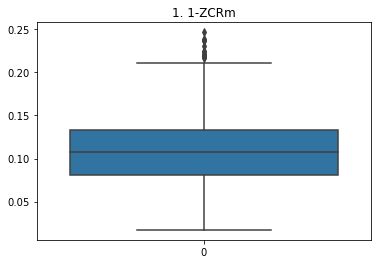

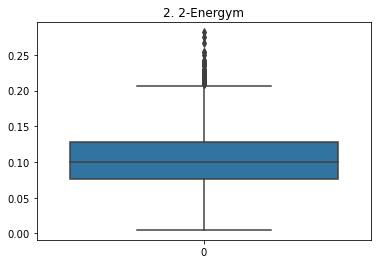

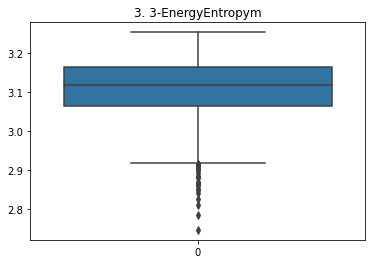

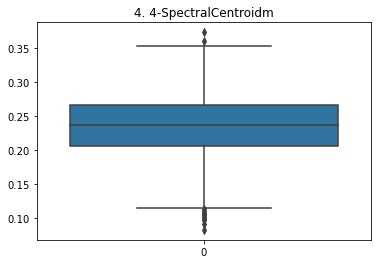

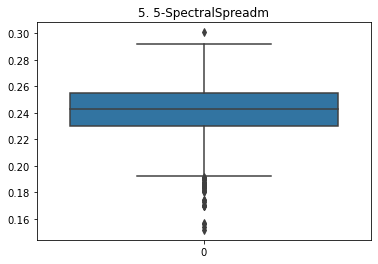

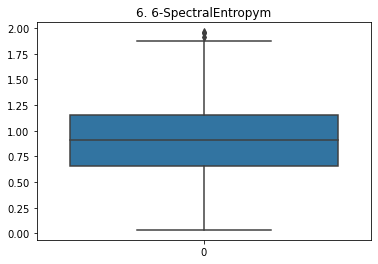

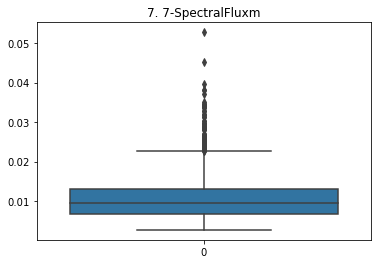

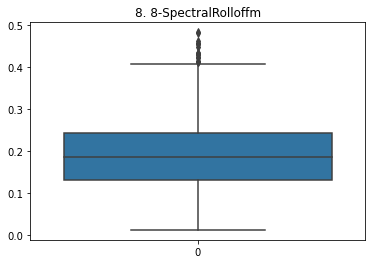

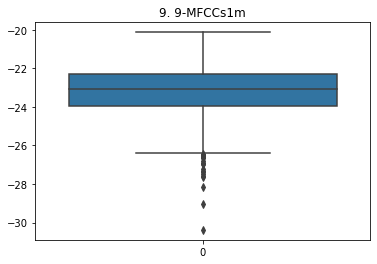

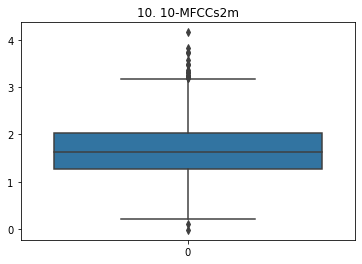

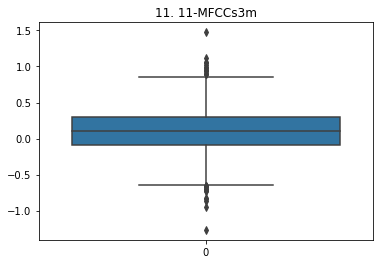

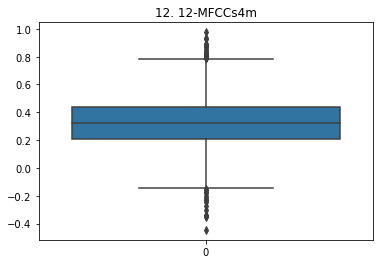

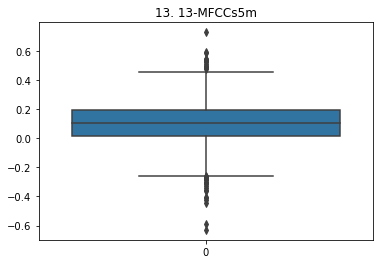

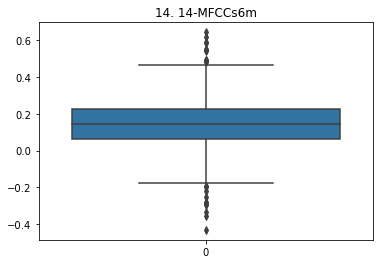

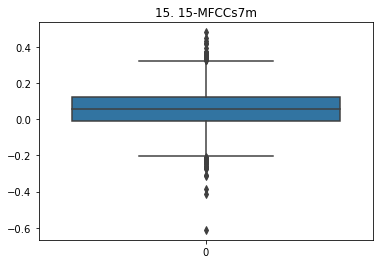

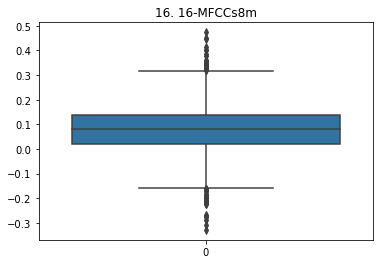

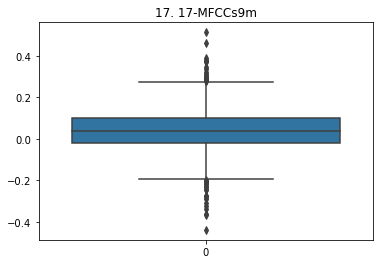

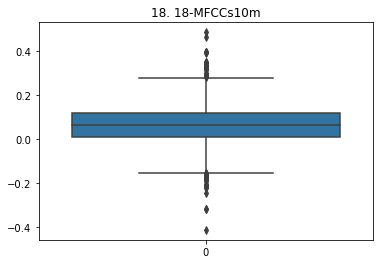

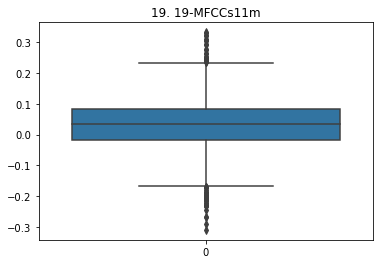

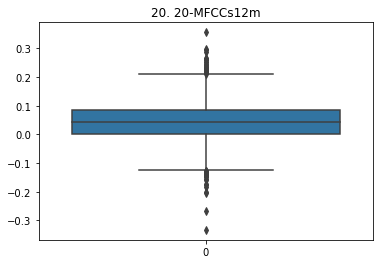

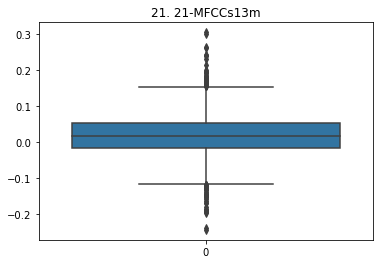

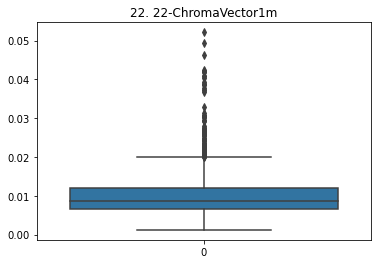

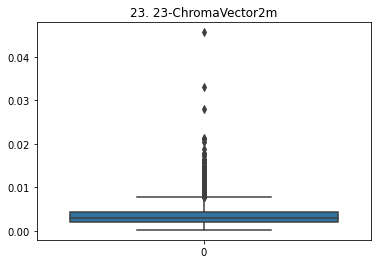

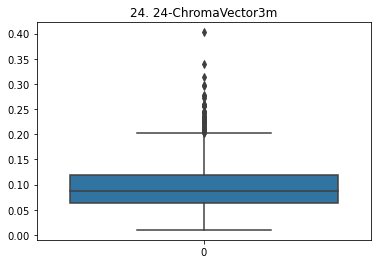

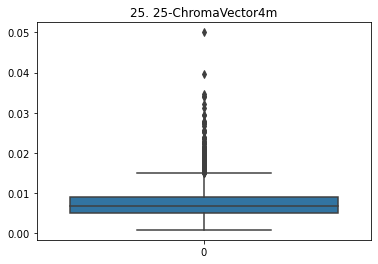

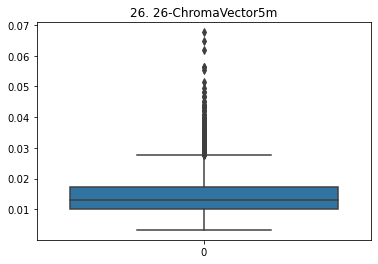

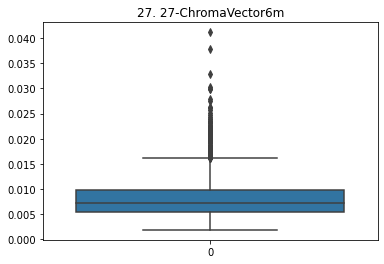

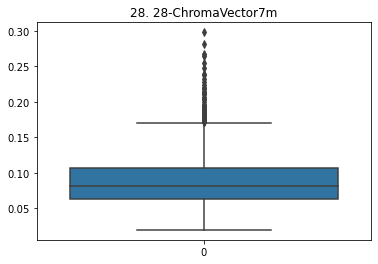

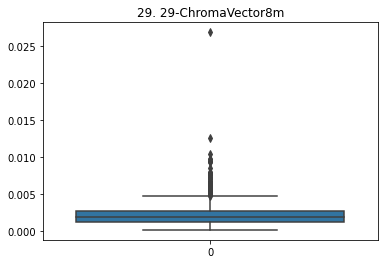

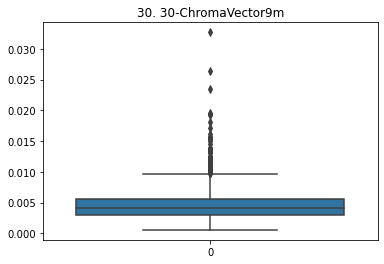

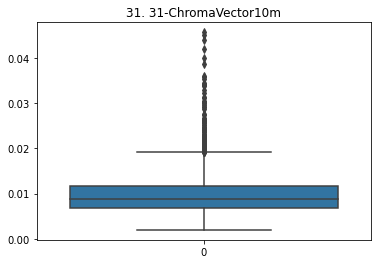

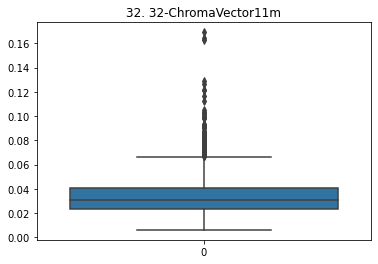

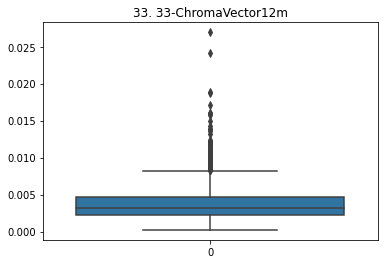

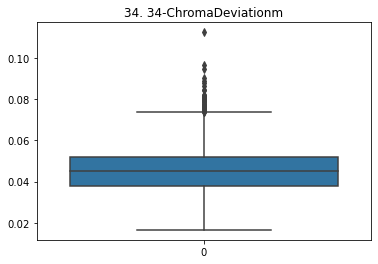

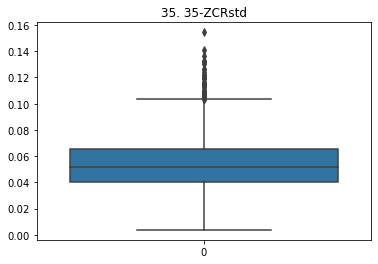

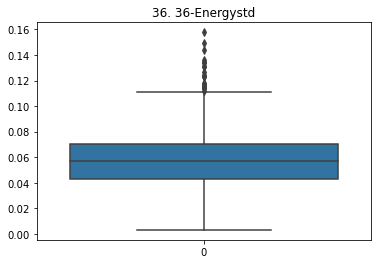

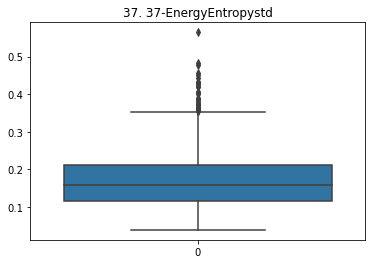

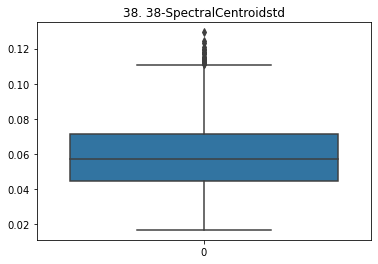

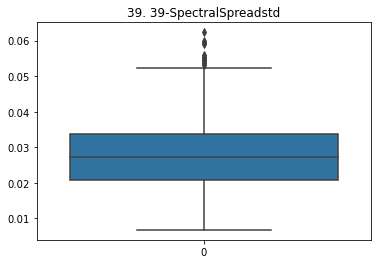

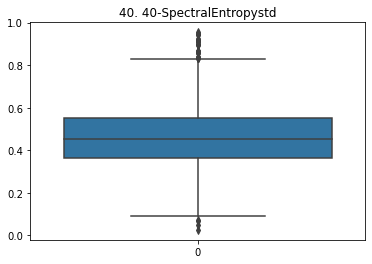

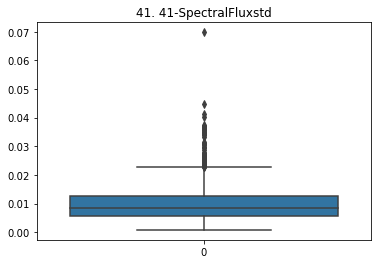

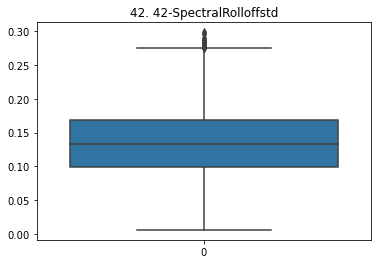

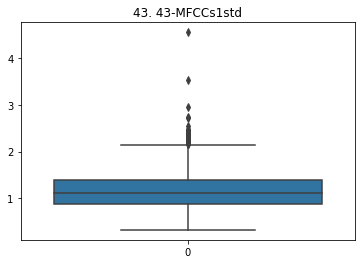

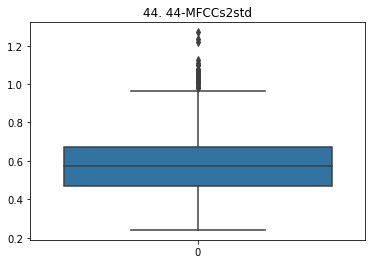

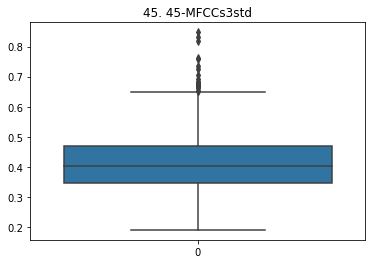

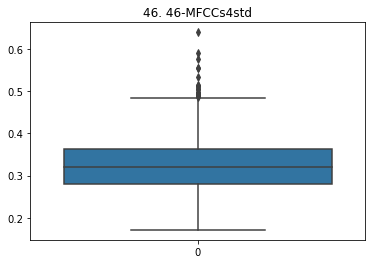

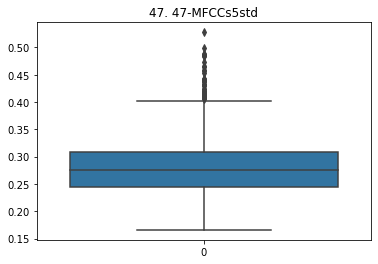

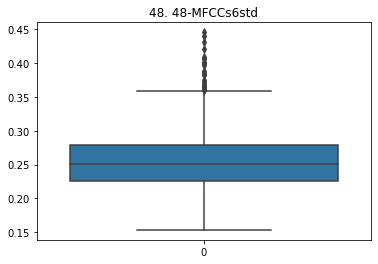

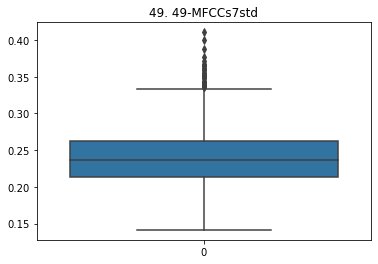

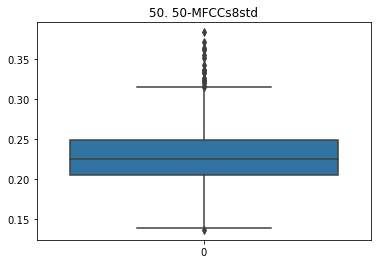

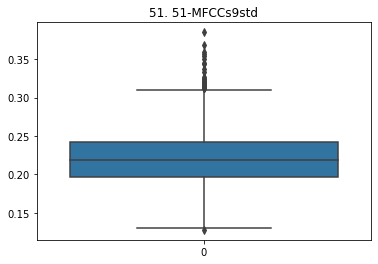

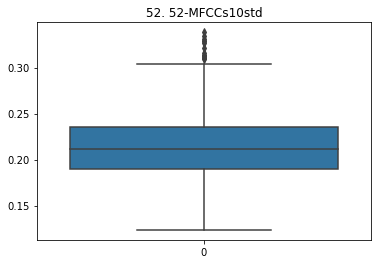

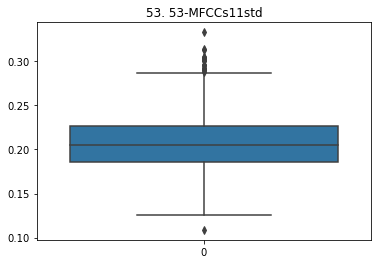

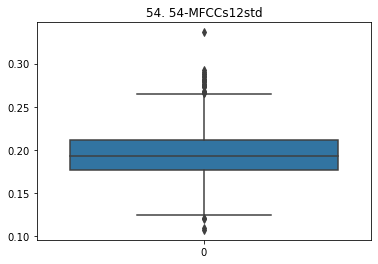

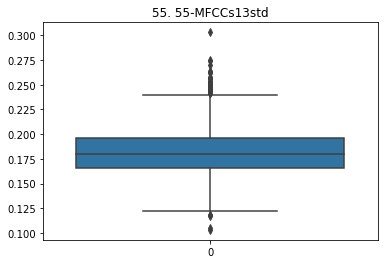

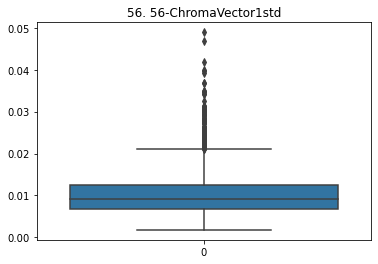

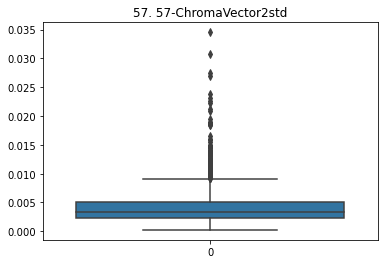

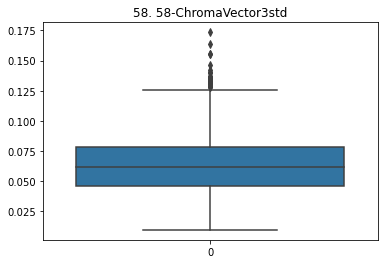

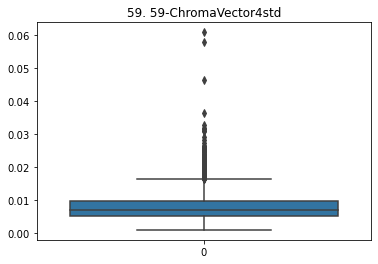

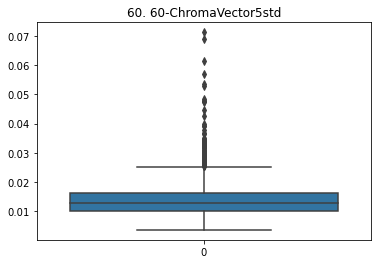

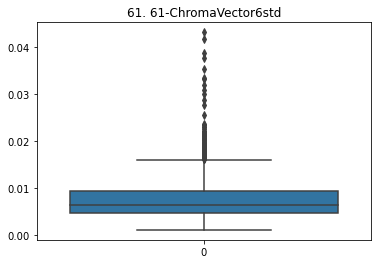

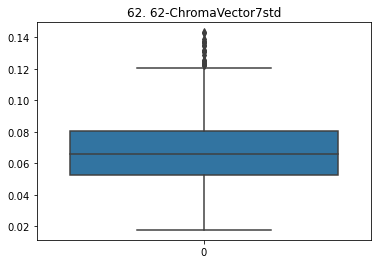

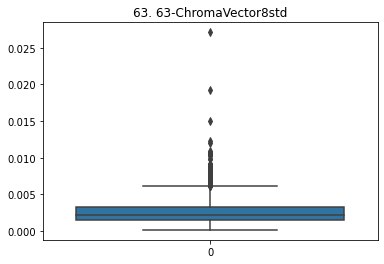

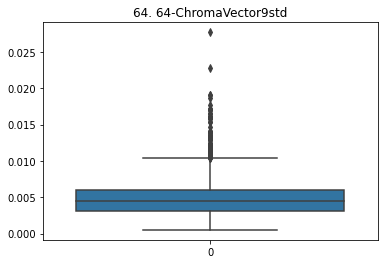

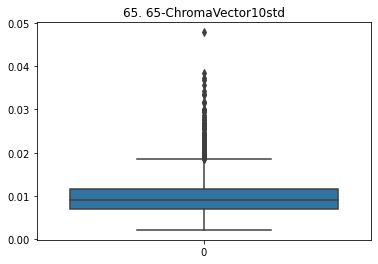

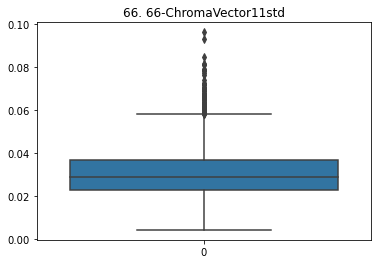

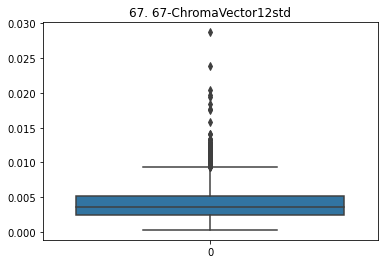

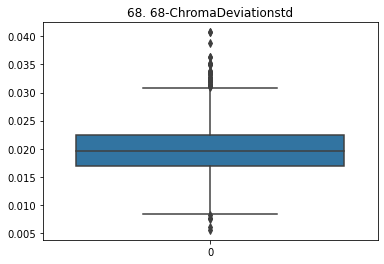

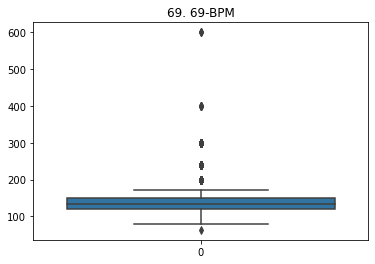

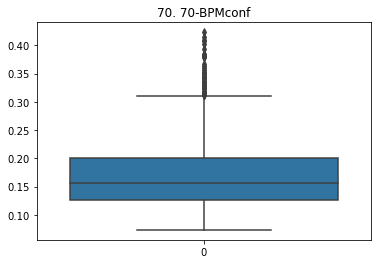

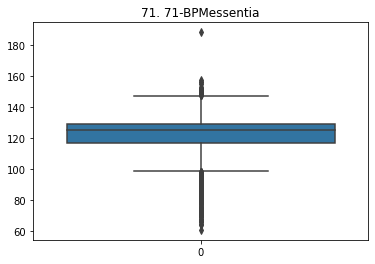

In [ ]:
i=0
for col in x.columns:
    i+=1
    sns.boxplot(data=x[col]).set_title(f'{i}. {col}')
    plt.show()

In [ ]:
x.isnull().sum()

1-ZCRm                   0
2-Energym                0
3-EnergyEntropym         0
4-SpectralCentroidm      0
5-SpectralSpreadm        0
                        ..
67-ChromaVector12std     0
68-ChromaDeviationstd    0
69-BPM                   0
70-BPMconf               0
71-BPMessentia           0
Length: 71, dtype: int64

In [ ]:
def anomaly_processing(col):
    global x
    ''' Detection '''
    # IQR
    q1 = np.percentile(x[col], 25, interpolation = 'midpoint')

    q3 = np.percentile(x[col], 75, interpolation = 'midpoint')
    iqr = q3 - q1

    # Upper bound
    upper = x.loc[x[col] > (q3+1.5*iqr), col]
    lower = x.loc[x[col] < (q1-1.5*iqr), col]

    ''' Replacing with nan'''
    x.loc[x[col] > (q3+1.5*iqr),col] = np.nan
    x.loc[x[col] < (q1-1.5*iqr),col] = np.nan

    return [lower, upper]

for col in x.columns:
    found = anomaly_processing(col)
    print(f'{col}: {len(found[0])+len(found[1])} выбросов')

1-ZCRm: 14 выбросов
2-Energym: 47 выбросов
3-EnergyEntropym: 26 выбросов
4-SpectralCentroidm: 12 выбросов
5-SpectralSpreadm: 34 выбросов
6-SpectralEntropym: 3 выбросов
7-SpectralFluxm: 72 выбросов
8-SpectralRolloffm: 16 выбросов
9-MFCCs1m: 23 выбросов
10-MFCCs2m: 20 выбросов
11-MFCCs3m: 28 выбросов
12-MFCCs4m: 41 выбросов
13-MFCCs5m: 37 выбросов
14-MFCCs6m: 23 выбросов
15-MFCCs7m: 52 выбросов
16-MFCCs8m: 53 выбросов
17-MFCCs9m: 44 выбросов
18-MFCCs10m: 56 выбросов
19-MFCCs11m: 55 выбросов
20-MFCCs12m: 51 выбросов
21-MFCCs13m: 89 выбросов
22-ChromaVector1m: 92 выбросов
23-ChromaVector2m: 131 выбросов
24-ChromaVector3m: 47 выбросов
25-ChromaVector4m: 113 выбросов
26-ChromaVector5m: 116 выбросов
27-ChromaVector6m: 120 выбросов
28-ChromaVector7m: 70 выбросов
29-ChromaVector8m: 102 выбросов
30-ChromaVector9m: 78 выбросов
31-ChromaVector10m: 110 выбросов
32-ChromaVector11m: 82 выбросов
33-ChromaVector12m: 99 выбросов
34-ChromaDeviationm: 44 выбросов
35-ZCRstd: 56 выбросов
36-Energystd: 22 вы

In [ ]:
x.isnull().sum()

1-ZCRm                    14
2-Energym                 47
3-EnergyEntropym          26
4-SpectralCentroidm       12
5-SpectralSpreadm         34
                        ... 
67-ChromaVector12std      90
68-ChromaDeviationstd     40
69-BPM                   330
70-BPMconf                53
71-BPMessentia           369
Length: 71, dtype: int64

### 6. заполнение пропусков 
    - сумма пропусков
    - замена пропусков в категориальных признаках с помощью моды, для чисел возьмем медианное

In [ ]:
df=x.join(pd.Series(y, name=target))
print('Сумма всех найденных пропусков в датасете:',sum(df.isnull().sum()))
df.isnull().sum()#Наличие пустых значений в столбцах

Сумма всех найденных пропусков в датасете: 4435


1-ZCRm                    14
2-Energym                 47
3-EnergyEntropym          26
4-SpectralCentroidm       12
5-SpectralSpreadm         34
                        ... 
68-ChromaDeviationstd     40
69-BPM                   330
70-BPMconf                53
71-BPMessentia           369
class                      0
Length: 72, dtype: int64

In [ ]:
# категориальные восстановим с помощью моды
for col in cats:
    x[col].fillna(x[col].mode()[0], inplace=True)

In [ ]:
# для чисел возьмем медианное
null_stat = x.isna().sum()#количество пропусков в колонках X
null_cols = null_stat[null_stat != 0].index #названия колонок, в которых найдены пропуски

for col in x[null_cols]:#замена медианой
    x[col].fillna(x[col].median(), inplace=True)
x

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,1.594074,...,0.046397,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0
1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,1.261364,...,0.071726,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0
2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,1.425185,...,0.042900,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0
3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,1.463686,...,0.057999,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0
4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,1.187854,...,0.069485,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.123267,0.057100,3.208952,0.256296,0.251077,1.154926,0.005292,0.224646,-22.367698,1.332630,...,0.069381,0.003534,0.004703,0.010987,0.032269,0.001926,0.016028,133.333333,0.210512,138.0
2296,0.142276,0.092951,3.115607,0.264407,0.255826,1.210942,0.010418,0.265019,-22.393598,1.576087,...,0.064406,0.002769,0.005422,0.008997,0.027547,0.003881,0.016097,133.333333,0.186191,141.0
2297,0.125569,0.030196,3.192922,0.224583,0.216269,1.031649,0.004061,0.258191,-23.505045,1.646389,...,0.030517,0.003643,0.005395,0.005646,0.014202,0.004689,0.009465,133.333333,0.142741,125.0
2298,0.118206,0.108737,3.149557,0.253396,0.246574,1.066546,0.008032,0.200640,-22.203477,1.200322,...,0.071779,0.001375,0.003538,0.006213,0.035527,0.001729,0.020659,133.333333,0.232040,133.0


In [ ]:
print('Сумма всех найденных пропусков в датасете:',sum(x.isnull().sum()))
x.isnull().sum()#Наличие пустых значений в столбцах

Сумма всех найденных пропусков в датасете: 0


1-ZCRm                   0
2-Energym                0
3-EnergyEntropym         0
4-SpectralCentroidm      0
5-SpectralSpreadm        0
                        ..
67-ChromaVector12std     0
68-ChromaDeviationstd    0
69-BPM                   0
70-BPMconf               0
71-BPMessentia           0
Length: 71, dtype: int64

### 7. Перевод категориальных признаков в числовой тип (get_dummies/labelencoder)+целевую переменную если она типа object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])
x

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,1.594074,...,0.046397,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0
1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,1.261364,...,0.071726,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0
2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,1.425185,...,0.042900,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0
3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,1.463686,...,0.057999,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0
4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,1.187854,...,0.069485,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.123267,0.057100,3.208952,0.256296,0.251077,1.154926,0.005292,0.224646,-22.367698,1.332630,...,0.069381,0.003534,0.004703,0.010987,0.032269,0.001926,0.016028,133.333333,0.210512,138.0
2296,0.142276,0.092951,3.115607,0.264407,0.255826,1.210942,0.010418,0.265019,-22.393598,1.576087,...,0.064406,0.002769,0.005422,0.008997,0.027547,0.003881,0.016097,133.333333,0.186191,141.0
2297,0.125569,0.030196,3.192922,0.224583,0.216269,1.031649,0.004061,0.258191,-23.505045,1.646389,...,0.030517,0.003643,0.005395,0.005646,0.014202,0.004689,0.009465,133.333333,0.142741,125.0
2298,0.118206,0.108737,3.149557,0.253396,0.246574,1.066546,0.008032,0.200640,-22.203477,1.200322,...,0.071779,0.001375,0.003538,0.006213,0.035527,0.001729,0.020659,133.333333,0.232040,133.0


In [ ]:
if y.dtype == 'object':
        y = le.fit_transform(y)
y

array([ 0,  0,  0, ..., 22, 22, 22])

### 7. выбор существенных признаков на основе матрицы корреляции (удаление избыточных или несущественных признаков)

In [ ]:
df=x.join(pd.Series(y, name=target))
df

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,1.594074,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,0
1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,1.261364,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,0
2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,1.425185,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,0
3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,1.463686,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,0
4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,1.187854,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,0.123267,0.057100,3.208952,0.256296,0.251077,1.154926,0.005292,0.224646,-22.367698,1.332630,...,0.003534,0.004703,0.010987,0.032269,0.001926,0.016028,133.333333,0.210512,138.0,22
2296,0.142276,0.092951,3.115607,0.264407,0.255826,1.210942,0.010418,0.265019,-22.393598,1.576087,...,0.002769,0.005422,0.008997,0.027547,0.003881,0.016097,133.333333,0.186191,141.0,22
2297,0.125569,0.030196,3.192922,0.224583,0.216269,1.031649,0.004061,0.258191,-23.505045,1.646389,...,0.003643,0.005395,0.005646,0.014202,0.004689,0.009465,133.333333,0.142741,125.0,22
2298,0.118206,0.108737,3.149557,0.253396,0.246574,1.066546,0.008032,0.200640,-22.203477,1.200322,...,0.001375,0.003538,0.006213,0.035527,0.001729,0.020659,133.333333,0.232040,133.0,22


## можно пропустить пункт

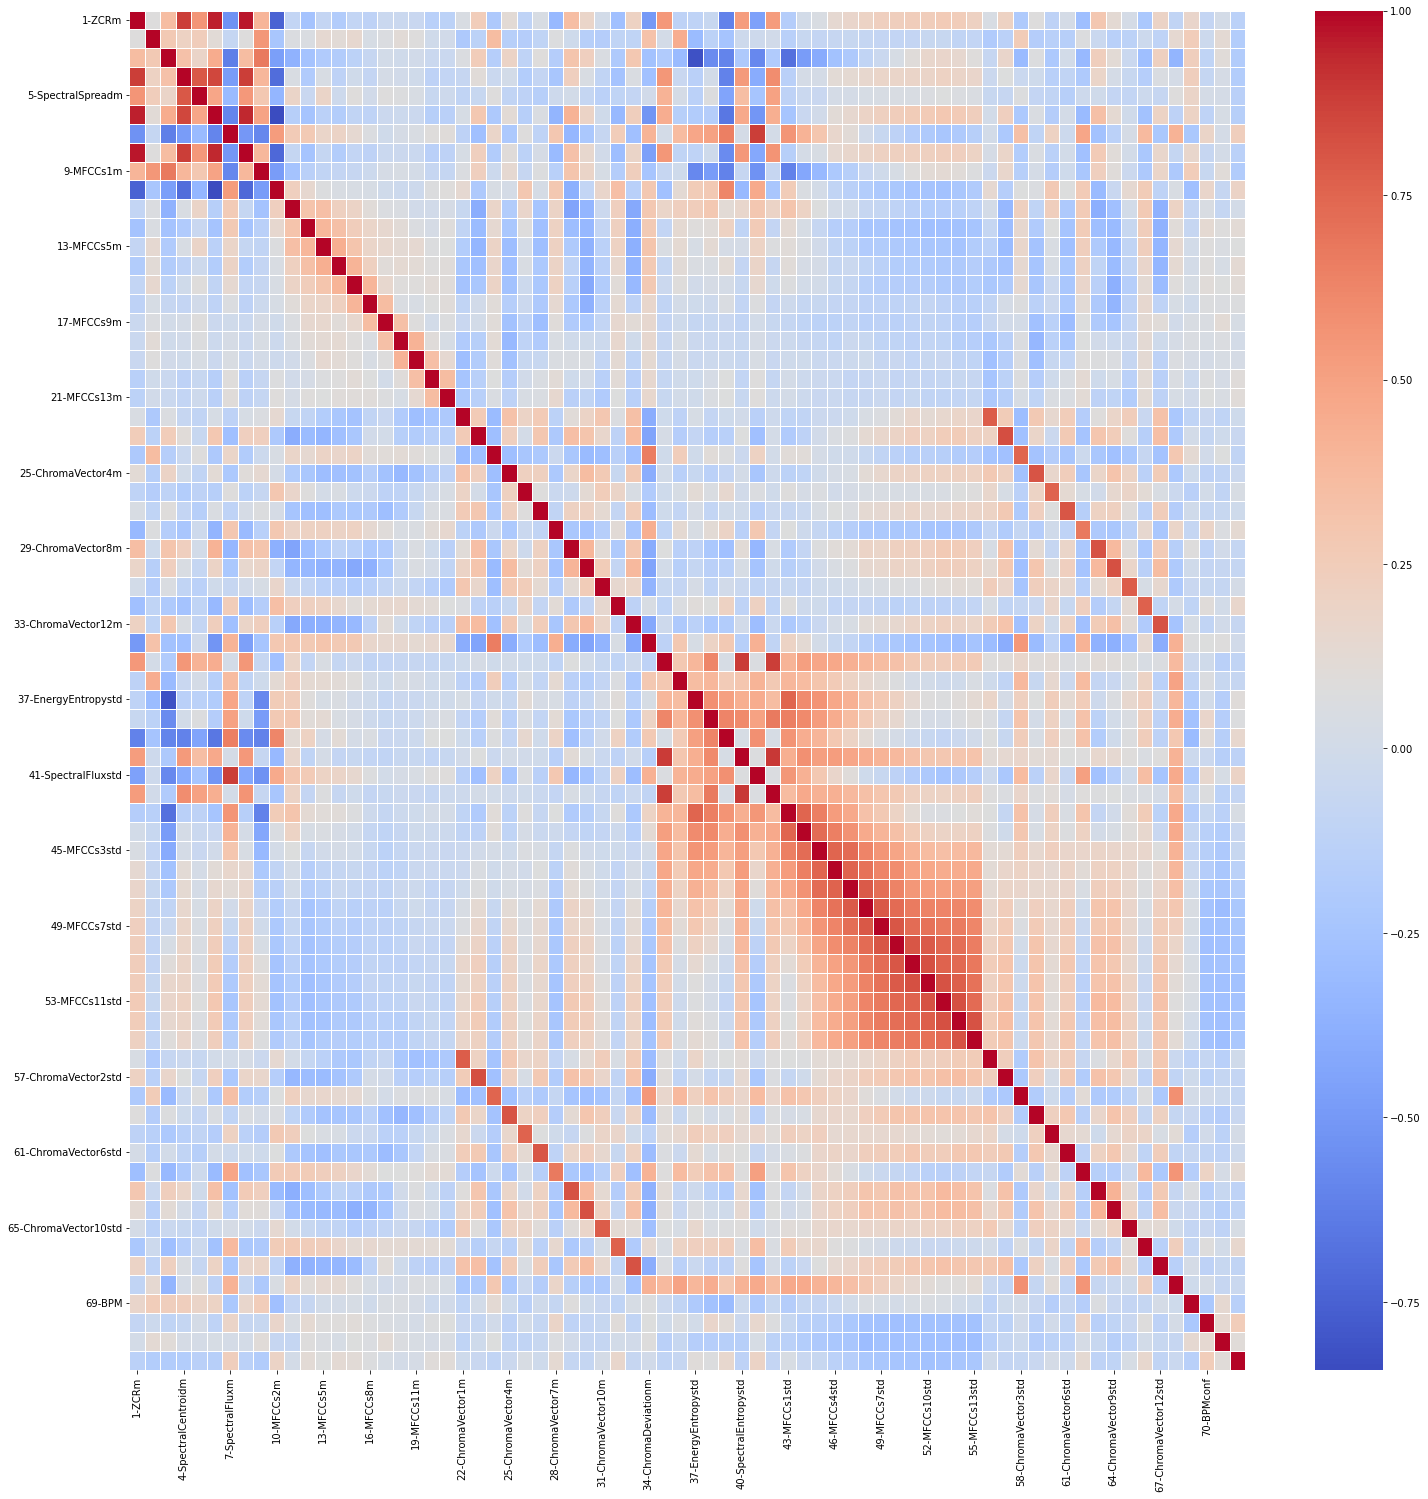

In [ ]:
ax = sns.heatmap(
    df.corr(),
    cmap='coolwarm', linewidth=.5
)
ax.figure.set_size_inches(25, 25)

In [ ]:
df.corr().style.background_gradient(cmap = "coolwarm")

,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,11-MFCCs3m,12-MFCCs4m,13-MFCCs5m,14-MFCCs6m,15-MFCCs7m,16-MFCCs8m,17-MFCCs9m,18-MFCCs10m,19-MFCCs11m,20-MFCCs12m,21-MFCCs13m,22-ChromaVector1m,23-ChromaVector2m,24-ChromaVector3m,25-ChromaVector4m,26-ChromaVector5m,27-ChromaVector6m,28-ChromaVector7m,29-ChromaVector8m,30-ChromaVector9m,31-ChromaVector10m,32-ChromaVector11m,33-ChromaVector12m,34-ChromaDeviationm,35-ZCRstd,36-Energystd,37-EnergyEntropystd,38-SpectralCentroidstd,39-SpectralSpreadstd,40-SpectralEntropystd,41-SpectralFluxstd,42-SpectralRolloffstd,43-MFCCs1std,44-MFCCs2std,45-MFCCs3std,46-MFCCs4std,47-MFCCs5std,48-MFCCs6std,49-MFCCs7std,50-MFCCs8std,51-MFCCs9std,52-MFCCs10std,53-MFCCs11std,54-MFCCs12std,55-MFCCs13std,56-ChromaVector1std,57-ChromaVector2std,58-ChromaVector3std,59-ChromaVector4std,60-ChromaVector5std,61-ChromaVector6std,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
1-ZCRm,1.000000,0.083212,0.358580,0.881557,0.558695,0.951058,-0.535397,0.969292,0.402550,-0.743830,-0.089375,-0.257175,-0.083077,-0.184109,-0.093096,-0.120285,-0.043814,-0.045625,-0.053838,-0.144194,-0.127493,0.047303,0.246388,-0.208208,0.120973,-0.114955,0.038802,-0.319881,0.351711,0.175616,0.005220,-0.277024,0.205904,-0.501941,0.540407,-0.118652,-0.109653,-0.061507,-0.604770,0.520300,-0.458525,0.527308,-0.170355,0.005616,0.046099,0.142865,0.166264,0.196811,0.226523,0.234949,0.241013,0.244429,0.261964,0.247084,0.214051,0.042966,0.204335,-0.196766,0.079444,-0.117118,0.020129,-0.280673,0.291212,0.127962,0.020130,-0.221779,0.187210,-0.094715,0.166201,-0.085825,0.011156,-0.133281
2-Energym,0.083212,1.000000,0.278833,0.202332,0.241589,0.112235,-0.076037,0.083129,0.553348,-0.232466,0.063668,0.051632,0.136926,0.112361,0.148225,0.030512,0.058104,0.110505,0.083934,-0.008392,-0.006392,-0.207115,-0.126248,0.353628,-0.157724,-0.168696,-0.105916,0.067245,-0.018735,-0.151537,-0.168537,-0.103668,-0.106409,0.322032,0.007899,0.440947,-0.308604,-0.125229,-0.251569,-0.024359,-0.026220,-0.006680,-0.146987,-0.060008,-0.082392,-0.067731,-0.059455,-0.074019,-0.083338,-0.089113,-0.081759,-0.058524,-0.057879,-0.099330,-0.088668,-0.189587,-0.136274,0.251973,-0.170432,-0.146754,-0.153120,0.065781,-0.043913,-0.146586,-0.127580,-0.033587,-0.110871,0.138596,0.249774,-0.029942,0.127880,-0.177372
3-EnergyEntropym,0.358580,0.278833,1.000000,0.327250,0.180853,0.451195,-0.623336,0.354524,0.674468,-0.470065,-0.360197,-0.251764,-0.188965,-0.182435,-0.125696,-0.069770,0.001498,-0.012683,-0.001468,-0.048870,-0.046492,0.062882,0.245192,-0.163758,0.192614,-0.110588,0.092795,-0.171554,0.307793,0.229647,0.050841,-0.200220,0.287323,-0.261544,-0.192487,-0.314558,-0.813271,-0.563930,-0.602607,-0.206945,-0.575724,-0.191182,-0.685994,-0.488660,-0.405611,-0.263884,-0.208497,-0.095852,-0.045331,0.030875,0.096730,0.163832,0.172571,0.145460,0.092740,-0.068797,0.166468,-0.312530,0.065398,-0.210467,0.000657,-0.319133,0.233604,0.117120,-0.049254,-0.281992,0.222842,-0.349281,0.232656,-0.104932,0.101852,-0.185585
4-SpectralCentroidm,0.881557,0.202332,0.327250,1.000000,0.795714,0.850811,-0.487760,0.879177,0.391942,-0.704283,0.048199,-0.193710,0.041234,-0.118369,-0.008431,-0.081299,0.014637,-0.001756,-0.011461,-0.121324,-0.087087,-0.065614,0.103952,-0.048529,0.001010,-0.172812,-0.079732,-0.230489,0.224020,0.043292,-0.099326,-0.256760,0.056773,-0.269098,0.548715,-0.055732,-0.142071,0.006334,-0.609041,0.533678,-0.398932,0.591852,-0.142751,0.019088,0.021212,0.118245,0.132268,0.152296,0.175476,0.179538,0.180423,0.181072,0.204096,0.186872,0.169517,-0.042835,0.072420,-0.046855,-0.018434,-0.146095,-0.094175,-0.195030,0.174481,0.015071,-0.061269,-0.161018,0.051624,0.020157,0.230840,-0.074875,0.024705,-0.172991
5-SpectralSpreadm,0.558695,0.241589,0.180853,0.795714,1.000000,0.

### Удалим столбцы, которые сильно коррелируют друг с другом

In [ ]:
new_df = df.drop(["1-ZCRm", "3-EnergyEntropym", "4-SpectralCentroidm", "7-SpectralFluxm", "6-SpectralEntropym",
                       "22-ChromaVector1m", "23-ChromaVector2m", "25-ChromaVector4m", "26-ChromaVector5m", "27-ChromaVector6m",
                       "29-ChromaVector8m", "30-ChromaVector9m", "31-ChromaVector10m", "33-ChromaVector12m", "35-ZCRstd",
                       "40-SpectralEntropystd"], axis = 1)

new_df.corr().style.background_gradient(cmap = "coolwarm")

,2-Energym,5-SpectralSpreadm,8-SpectralRolloffm,9-MFCCs1m,10-MFCCs2m,11-MFCCs3m,12-MFCCs4m,13-MFCCs5m,14-MFCCs6m,15-MFCCs7m,16-MFCCs8m,17-MFCCs9m,18-MFCCs10m,19-MFCCs11m,20-MFCCs12m,21-MFCCs13m,24-ChromaVector3m,28-ChromaVector7m,32-ChromaVector11m,34-ChromaDeviationm,36-Energystd,37-EnergyEntropystd,38-SpectralCentroidstd,39-SpectralSpreadstd,41-SpectralFluxstd,42-SpectralRolloffstd,43-MFCCs1std,44-MFCCs2std,45-MFCCs3std,46-MFCCs4std,47-MFCCs5std,48-MFCCs6std,49-MFCCs7std,50-MFCCs8std,51-MFCCs9std,52-MFCCs10std,53-MFCCs11std,54-MFCCs12std,55-MFCCs13std,56-ChromaVector1std,57-ChromaVector2std,58-ChromaVector3std,59-ChromaVector4std,60-ChromaVector5std,61-ChromaVector6std,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
2-Energym,1.000000,0.241589,0.083129,0.553348,-0.232466,0.063668,0.051632,0.136926,0.112361,0.148225,0.030512,0.058104,0.110505,0.083934,-0.008392,-0.006392,0.353628,0.067245,-0.103668,0.322032,0.440947,-0.308604,-0.125229,-0.251569,-0.026220,-0.006680,-0.146987,-0.060008,-0.082392,-0.067731,-0.059455,-0.074019,-0.083338,-0.089113,-0.081759,-0.058524,-0.057879,-0.099330,-0.088668,-0.189587,-0.136274,0.251973,-0.170432,-0.146754,-0.153120,0.065781,-0.043913,-0.146586,-0.127580,-0.033587,-0.110871,0.138596,0.249774,-0.029942,0.127880,-0.177372
5-SpectralSpreadm,0.241589,1.000000,0.546276,0.284547,-0.339128,0.185307,-0.055318,0.183518,-0.026804,0.089093,-0.007149,0.080493,0.065781,0.036721,-0.057798,-0.022724,0.083949,-0.022811,-0.106807,-0.003896,0.020991,-0.134058,0.070974,-0.442883,-0.237902,0.496489,-0.116587,-0.046182,-0.056667,0.014937,0.016074,0.031485,0.041977,0.048532,0.050134,0.059900,0.074292,0.058476,0.054495,-0.064023,-0.071177,0.070242,-0.085202,-0.097634,-0.156425,-0.026072,-0.014311,-0.082387,-0.092971,-0.031708,-0.069050,0.082143,0.183992,0.015856,0.019064,-0.140424
8-SpectralRolloffm,0.083129,0.546276,1.000000,0.384364,-0.722504,-0.078438,-0.251100,-0.074637,-0.174249,-0.086445,-0.118145,-0.043929,-0.039374,-0.047912,-0.138620,-0.117818,-0.181614,-0.310180,-0.288617,-0.465098,-0.106069,-0.112614,-0.019304,-0.564078,-0.424418,0.566272,-0.152009,0.019261,0.039690,0.142947,0.160412,0.185365,0.209710,0.216700,0.222717,0.221826,0.235906,0.225514,0.195485,0.023107,0.178322,-0.173638,0.053015,-0.132657,0.004431,-0.268802,0.263350,0.105284,0.005506,-0.220008,0.162599,-0.072525,0.164515,-0.067346,0.011608,-0.130855
9-MFCCs1m,0.553348,0.284547,0.384364,1.000000,-0.488762,-0.255832,-0.141168,-0.099320,-0.084567,-0.066370,-0.032716,0.022563,0.041071,0.009839,-0.067927,-0.072361,-0.033989,-0.145931,-0.166517,-0.237441,-0.016327,-0.580091,-0.488677,-0.606956,-0.534247,-0.064925,-0.608598,-0.424494,-0.322007,-0.209333,-0.155721,-0.052031,-0.012431,0.033613,0.086804,0.121878,0.127202,0.102715,0.071820,-0.041328,0.160023,-0.155978,0.016536,-0.165901,-0.016044,-0.230008,0.226744,0.097113,-0.038113,-0.207200,0.178278,-0.203510,0.249286,-0.058126,0.104919,-0.183274
10-MFCCs2m,-0.232466,-0.339128,-0.722504,-0.488762,1.000000,0.230071,0.150382,0.067889,0.044017,0.042670,0.031333,-0.009466,-0.029618,-0.025129,0.071954,0.087954,0.042917,0.281468,0.341848,0.284101,0.129473,0.253080,0.279110,0.623860,0.456390,-0.234231,0.254549,0.050867,0.012880,-0.094317,-0.142967,-0.174780,-0.210460,-0.218163,-0.248555,-0.251754,-0.261489,-0.223150,-0.191475,0.139372,-0.159518,0.073693,0.063788,0.273544,0.076443,0.261475,-0.314750,-0.051525,0.142142,0.252081,-0.111433,0.045301,-0.280046,0.165921,-0.068214,0.187846
11-MFCCs3m,0.063668,0.185307,-0.078438,-0.255832,0.230071,1.000000,0.313743,0.342935,0.219141,0.194092,0.103689,0.060414,0.053661,-0.003029,-0.006188,0.022802,0.173932,0.187086,0.225409,0.286128,0.224278,0.240240,0.285434,0.118106,0.291148,0.193056,0.308318,0.200251,0.075172,0.013737,0.000530,-0.066530,-0.073286,-0.114098,-0.140392,-0.178676,-0.172154,-0.144839,-0.112208,0.009543,-0.330216,0.217

### 8. сохранение в файл

In [ ]:
new_df.to_csv('beatsdataset_preprocessed.csv', index=False)